<a href="https://colab.research.google.com/github/paullo0106/prophet_anomaly_detection/blob/master/prophet_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Example notebook

Load data, fit and plot anomalies with different models and time frames setup



In [0]:
from fbprophet import Prophet

In [0]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [0]:
from datetime import datetime

In [0]:
import fbprophet

In [26]:
fbprophet.__version__

'0.5'

### Load data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')

In [28]:
df.shape

(2905, 2)

In [29]:
df.dtypes

ds     object
y     float64
dtype: object

In [0]:
df.ds = pd.to_datetime(df.ds)
df.index = df.ds

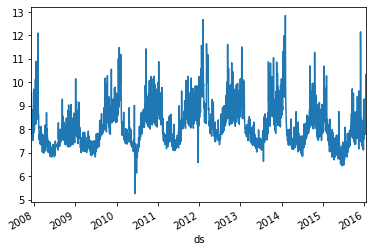

In [31]:
df.y.plot()
plt.show()

In [0]:
# use specific time frame for simplicity
df = df[(df.ds >= datetime(2011, 1, 1)) & (df.ds < datetime(2013, 3, 1))]

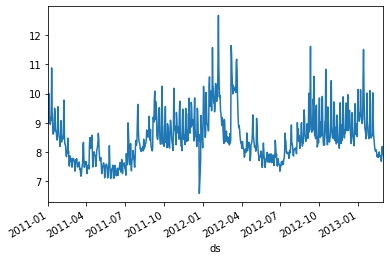

In [33]:
df.y.plot()
plt.show()

### Load utility functions
Code reference [here](https://github.com/paullo0106/prophet_anomaly_detection/blob/master/utils.py)

In [0]:
from utils import prophet_fit, prophet_plot, get_outliers

### Model training

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cutoff date:  2011-02-18 00:00:00
Use the data from 2011-01-01 00:00:00 to 2011-02-17 00:00:00 (48 days)
Predict 2011-02-18 00:00:00 to 2011-03-03 00:00:00 (14 days)
=====
actual value 7.51969240411654 fall outside of the prediction interval
interval: 7.618608456033438 to 8.719489951662977
Date: 2011-02-20
=====
actual value 7.750614732770409 fall outside of the prediction interval
interval: 6.61024204122569 to 7.716111716249796
Date: 2011-03-01


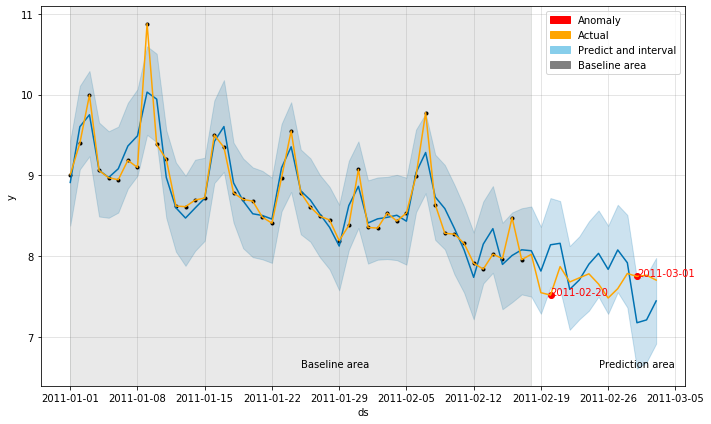

In [35]:
alpha=0.98

model = Prophet(interval_width=alpha, 
                yearly_seasonality=False, 
                weekly_seasonality=False, #holidays=us_public_holidays, 
                changepoint_prior_scale=0.5)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)

today_index = 48
print('Cutoff date: ', df.index[today_index])

predict_n = 14

fig, forecast, model = prophet_fit(df, model, today_index, predict_days=predict_n)

outliers, df_pred = get_outliers(df, forecast, today_index, predict_days=predict_n)

prophet_plot(df, fig, today_index, predict_days=predict_n, outliers=outliers)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cutoff date: 2011-02-18 00:00:00
Use the data from 2011-01-01 00:00:00 to 2011-02-17 00:00:00 (48 days)
Predict 2011-02-18 00:00:00 to 2011-03-03 00:00:00 (14 days)
=====
actual value 7.51969240411654 fall outside of the prediction interval
interval: 7.688167782742737 to 8.577728306358415
Date: 2011-02-20
=====
actual value 7.5989004568714105 fall outside of the prediction interval
interval: 7.609755672877553 to 8.51182681562738
Date: 2011-02-27
=====
actual value 7.750614732770409 fall outside of the prediction interval
interval: 6.7308616668518 to 7.60734889130807
Date: 2011-03-01
=====
actual value 7.764720544771481 fall outside of the prediction interval
interval: 6.7660187057303505 to 7.7168578677444515
Date: 2011-03-02


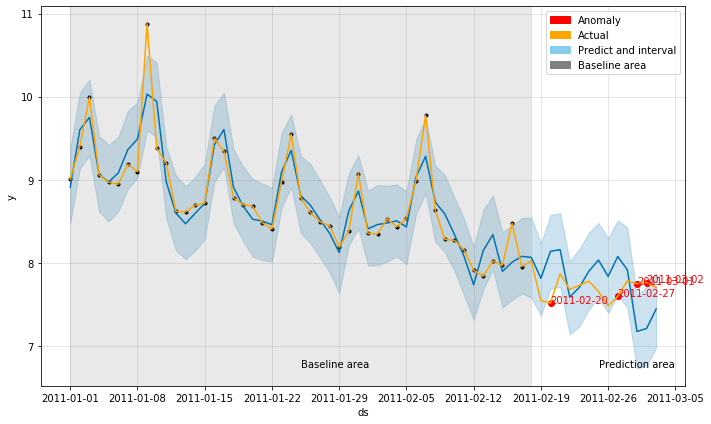

In [36]:
alpha=0.95

model = Prophet(interval_width=alpha, 
                yearly_seasonality=False, 
                weekly_seasonality=False,
                changepoint_prior_scale=0.5)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)

today_index = 48
print('Cutoff date:', df.index[today_index])

predict_n = 14

fig, forecast, model = prophet_fit(df, model, today_index, predict_days=predict_n)

outliers, df_pred = get_outliers(df, forecast, today_index, predict_days=predict_n)

prophet_plot(df, fig, today_index, predict_days=predict_n, outliers=outliers)

### Identify outliers

Look for the outliers in the dataframe

In [37]:
print('Predictions')
print(df_pred.head())
df_outlier = df_pred[(df_pred.actual > df_pred.upper_y) | (df_pred.actual < df_pred.lower_y)]
print('Outliers')
print(df_outlier.head())

Predictions
                   ds     preds   lower_y   upper_y    actual
2011-02-18 2011-02-18  8.068044  7.584058  8.549169  8.023552
2011-02-19 2011-02-19  7.816672  7.368423  8.236118  7.549083
2011-02-20 2011-02-20  8.141675  7.688168  8.577728  7.519692
2011-02-21 2011-02-21  8.160174  7.712562  8.602865  7.871693
2011-02-22 2011-02-22  7.590085  7.142669  8.024675  7.681560
Outliers
                   ds     preds   lower_y   upper_y    actual
2011-02-20 2011-02-20  8.141675  7.688168  8.577728  7.519692
2011-02-27 2011-02-27  8.077978  7.609756  8.511827  7.598900
2011-03-01 2011-03-01  7.177063  6.730862  7.607349  7.750615
2011-03-02 2011-03-02  7.212301  6.766019  7.716858  7.764721


### Experiment different time frame

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cutoff date: 2011-02-18 00:00:00
Use the data from 2011-01-14 00:00:00 to 2011-02-17 00:00:00 (35 days)
Predict 2011-02-18 00:00:00 to 2011-03-03 00:00:00 (14 days)
=====
actual value 8.02355239240435 fall outside of the prediction interval
interval: 6.447197861984709 to 6.914521452847012
Date: 2011-02-18
=====
actual value 7.549082710812289 fall outside of the prediction interval
interval: 4.217165279424295 to 4.9433686559846635
Date: 2011-02-19
=====
actual value 7.51969240411654 fall outside of the prediction interval
interval: 2.625112594898334 to 3.7786907368425866
Date: 2011-02-20
=====
actual value 7.871692664323651 fall outside of the prediction interval
interval: 1.9654891043719078 to 3.620380336433584
Date: 2011-02-21
=====
actual value 7.68156036255954 fall outside of the prediction interval
interval: 1.3985022797203681 to 3.6172300239622817
Date: 2011-02-22
=====
actual value 7.732369222284389 fall outside of the prediction interval
interval: 1.6856634480089925 to 4.5720227

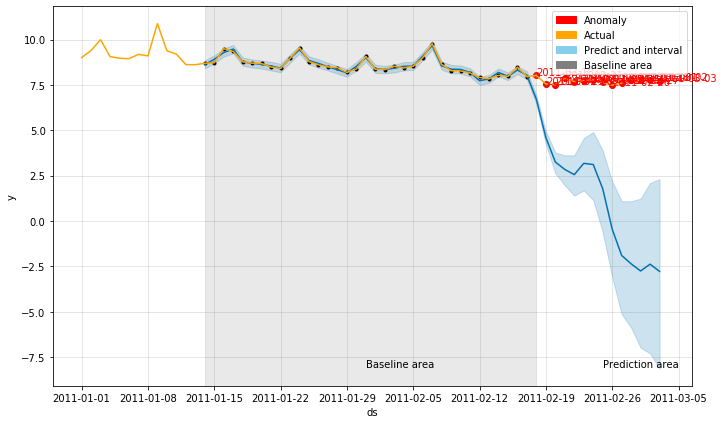

In [38]:
alpha=0.98

model = Prophet(interval_width=alpha, 
                yearly_seasonality=False, 
                weekly_seasonality=False, 
                changepoint_prior_scale=0.5)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)

today_index = 48
print('Cutoff date:', df.index[today_index])

predict_n = 14
lookback_n = 35

fig, forecast, model = prophet_fit(df, model, today_index, 
                                   lookback_days=lookback_n, 
                                   predict_days=predict_n)

outliers, df_pred = get_outliers(df, forecast, today_index, predict_days=predict_n)

prophet_plot(df, fig, today_index, 
             predict_days=predict_n, 
             lookback_days=lookback_n, 
             outliers=outliers)

### Experiment with different model parameters
Lower the changepoint scale to 0.1, as the previous fit seems off

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cutoff date: 2011-02-18 00:00:00
Use the data from 2011-01-14 00:00:00 to 2011-02-17 00:00:00 (35 days)
Predict 2011-02-18 00:00:00 to 2011-03-03 00:00:00 (14 days)
=====
actual value 7.7823903355874595 fall outside of the prediction interval
interval: 7.868278479687891 to 8.546107902866575
Date: 2011-02-24
=====
actual value 7.6563371664301805 fall outside of the prediction interval
interval: 7.793141580354593 to 8.512060734449028
Date: 2011-02-25
=====
actual value 7.750614732770409 fall outside of the prediction interval
interval: 6.882463867086292 to 7.5521676216849984
Date: 2011-03-01


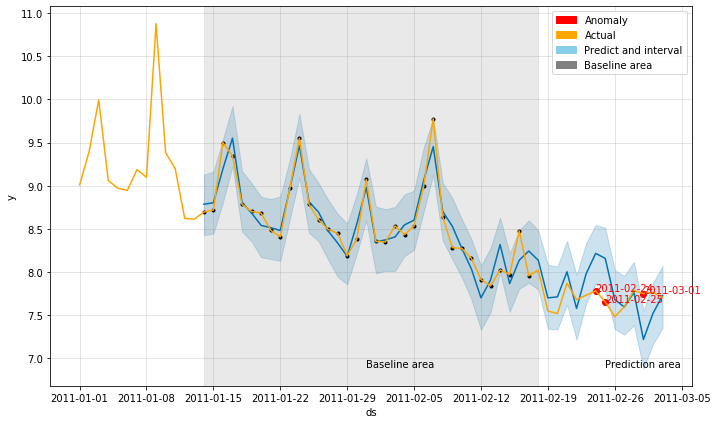

In [39]:
alpha=0.98

model = Prophet(interval_width=alpha, 
                     yearly_seasonality=False, 
                     weekly_seasonality=False, 
                     changepoint_prior_scale=0.1)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)

today_index = 48
print('Cutoff date:', df.index[today_index])

predict_n = 14
lookback_n = 35

fig, forecast, model = prophet_fit(df, model, today_index, 
                                   lookback_days=lookback_n, 
                                   predict_days=predict_n)

outliers, df_pred = get_outliers(df, forecast, today_index, predict_days=predict_n)

prophet_plot(df, fig, today_index, lookback_days=lookback_n, 
             predict_days=predict_n, outliers=outliers)



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 21.


Cutoff date: 2011-02-18 00:00:00
Use the data from 2011-01-21 00:00:00 to 2011-02-17 00:00:00 (28 days)
Predict 2011-02-18 00:00:00 to 2011-03-03 00:00:00 (14 days)
=====
actual value 7.70481192293259 fall outside of the prediction interval
interval: 6.3404198851091795 to 7.6402990998391225
Date: 2011-03-03


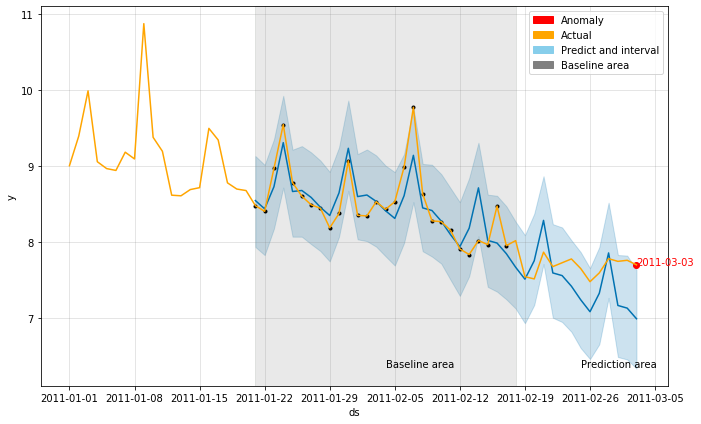

In [40]:
# changepoint_prior_scale: 0.1
# no monthly trend
alpha=0.98

model = Prophet(interval_width=alpha, 
                yearly_seasonality=False, 
                weekly_seasonality=False, 
                changepoint_prior_scale=0.1)
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)

today_index = 48
print('Cutoff date:', df.index[today_index])

predict_n = 14
lookback_n = 28

fig, forecast, model = prophet_fit(df, model, today_index, 
                                   lookback_days=lookback_n, 
                                   predict_days=predict_n)

outliers, df_pred = get_outliers(df, forecast, today_index, predict_days=predict_n)

prophet_plot(df, fig, today_index, lookback_days=lookback_n, 
             predict_days=predict_n, outliers=outliers)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 21.


Cutoff date: 2011-02-18 00:00:00
Use the data from 2011-01-21 00:00:00 to 2011-02-17 00:00:00 (28 days)
Predict 2011-02-18 00:00:00 to 2011-03-03 00:00:00 (14 days)
=====
actual value 7.750614732770409 fall outside of the prediction interval
interval: 6.656231749197341 to 7.704908470791665
Date: 2011-03-01
=====
actual value 7.764720544771481 fall outside of the prediction interval
interval: 6.556740939943326 to 7.670226639784035
Date: 2011-03-02
=====
actual value 7.70481192293259 fall outside of the prediction interval
interval: 6.463306557901364 to 7.570870295424856
Date: 2011-03-03


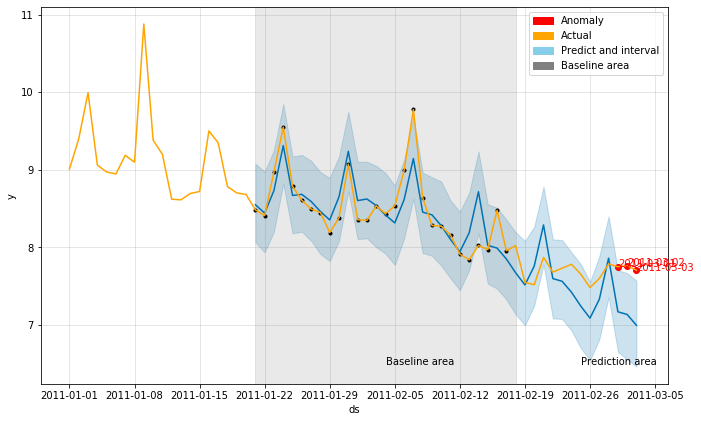

In [43]:
# decrease the confidence interval
alpha=0.95    

model = Prophet(interval_width=alpha, 
                     yearly_seasonality=False, 
                     weekly_seasonality=False, 
                     changepoint_prior_scale=0.1)
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)

today_index = 48
print('Cutoff date:', df.index[today_index])

predict_n = 14
lookback_n = 28

fig, forecast, model = prophet_fit(df, model, today_index, 
                                   lookback_days=lookback_n, 
                                   predict_days=predict_n)

outliers, df_pred = get_outliers(df, forecast, today_index, predict_days=predict_n)

prophet_plot(df, fig, today_index, lookback_days=lookback_n, 
             predict_days=predict_n, outliers=outliers)

### Experiment different time frames

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cutoff date: 2011-03-19 00:00:00
Use the data from 2011-02-12 00:00:00 to 2011-03-18 00:00:00 (35 days)
Predict 2011-03-19 00:00:00 to 2011-04-08 00:00:00 (21 days)
=====
actual value 7.4139702901904405 fall outside of the prediction interval
interval: 7.4811660711876575 to 7.843194247796313
Date: 2011-03-21
=====
actual value 8.269756947532981 fall outside of the prediction interval
interval: 7.19190663560945 to 7.6059487461444855
Date: 2011-03-24
=====
actual value 8.33134542484572 fall outside of the prediction interval
interval: 7.066821414520579 to 7.448657010888212
Date: 2011-03-25
=====
actual value 7.7844732357364705 fall outside of the prediction interval
interval: 6.886710118490797 to 7.288877545307153
Date: 2011-03-26
=====
actual value 7.597396320212789 fall outside of the prediction interval
interval: 7.630140411998437 to 8.126553894587174
Date: 2011-03-30
=====
actual value 7.4283331941908095 fall outside of the prediction interval
interval: 7.46345052863398 to 8.12269729

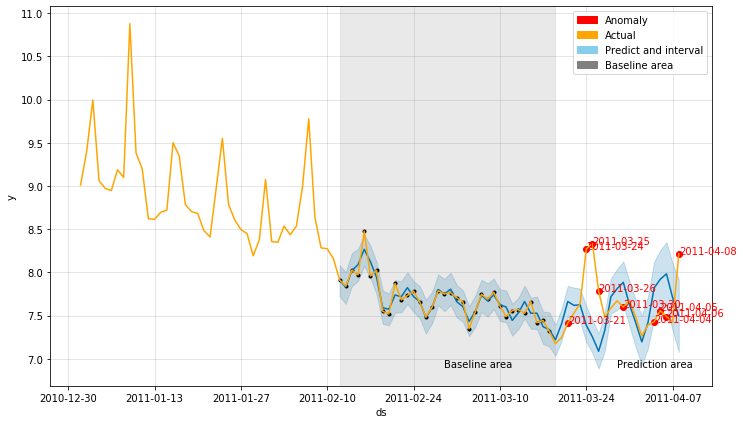

In [42]:
# different timeframe segments

alpha = 0.98
model = Prophet(interval_width=alpha, 
                     yearly_seasonality=False, 
                     weekly_seasonality=False, #holidays=us_public_holidays, 
                     changepoint_prior_scale=0.5)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_seasonality(name='weekly', period=7, fourier_order=3, prior_scale=0.1)

today_index = 77
print('Cutoff date:', df.index[today_index])

predict_n = 21
lookback_n = 35

fig, forecast, model = prophet_fit(df, model, today_index, lookback_days=lookback_n, predict_days=predict_n)

outliers, df_pred = get_outliers(df, forecast, today_index, predict_days=predict_n)

prophet_plot(df, fig, today_index, lookback_days=lookback_n, predict_days=predict_n, outliers=outliers)

### Other usage
* Diagnose the pattern with time-series decomposition
* Look at performance metrics including MSE, RMSE, MAP, MAPE (see [Prophet docs](https://facebook.github.io/prophet/docs/diagnostics.html) for details)

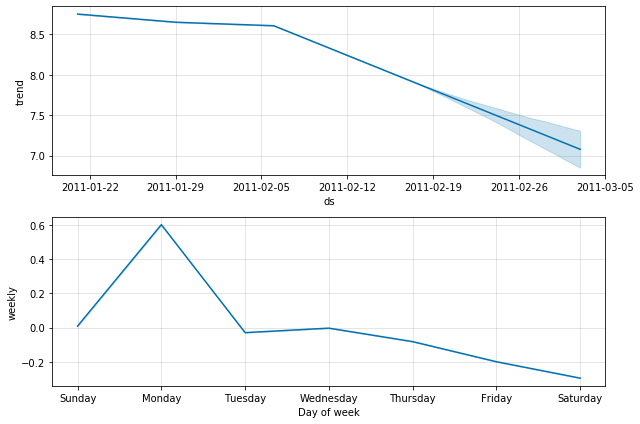

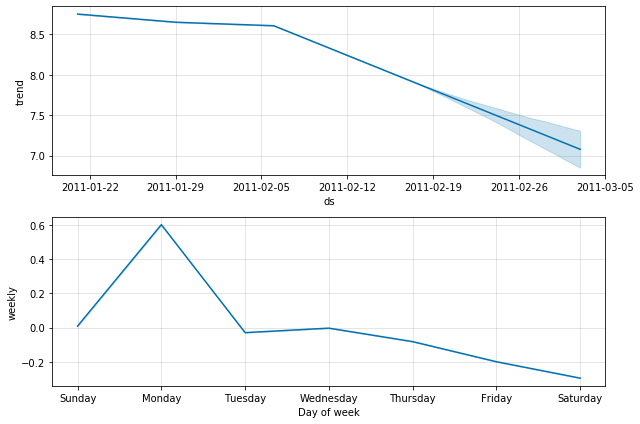

In [44]:
model.plot_components(forecast)

In [0]:
from fbprophet.diagnostics import cross_validation, performance_metrics


In [46]:
df_cv = cross_validation(model, horizon='3 days')
df_p = performance_metrics(df_cv)
df_p.head(10)

INFO:fbprophet:Making 11 forecasts with cutoffs between 2011-01-30 00:00:00 and 2011-02-14 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 9.
INFO:fbprophet:n_changepoints greater than number of observations.Using 10.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 12.
INFO:fbprophet:n_changepoints greater than number of observations.Using 14.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.
INFO:fbprophet:n_changepoints greater than number of observations.Using 16.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


,horizon,mse,rmse,mae,mape,coverage
0,0 days 12:00:00,0.057196,0.239158,0.183666,0.022328,0.600000
1,1 days 00:00:00,0.204375,0.452078,0.340429,0.040556,0.500000
2,1 days 12:00:00,0.134576,0.366846,0.288295,0.034653,0.600000
3,2 days 00:00:00,0.647238,0.804511,0.621303,0.074298,0.333333
4,2 days 12:00:00,0.202579,0.450088,0.381107,0.045841,0.600000
5,3 days 00:00:00,0.578891,0.760849,0.677993,0.083059,0.500000
